Setup

In [1]:
import toolbox_morph
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import glob

In [2]:
path_main_directory = '/home/wolbach/Desktop/SRMP/morph_project/'
path_SFH_table = path_main_directory + 'SFH/Behroozi+19/'

Grid

In [3]:
# make grid

alpha_test_values_list = np.linspace(0.0, 10.0, num=11)
beta_test_values_list = np.linspace(0.0, 3.0, num=7)
gamma_test_values_list = np.linspace(-3.0, 3.0, num=7)
delta_test_values_list = np.linspace(-3.0, 3.0, num=7)

print(alpha_test_values_list)
print(beta_test_values_list)
print(gamma_test_values_list)
print(delta_test_values_list)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[0.  0.5 1.  1.5 2.  2.5 3. ]
[-3. -2. -1.  0.  1.  2.  3.]
[-3. -2. -1.  0.  1.  2.  3.]


In [4]:
radius_kpc = np.linspace(0.0, 20.0, num=201)
print (radius_kpc)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7
 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1
 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5
 19.6 

Observations

In [5]:
def Mosleh2013_SF(mass):
    alpha, beta, gamma, M0 = 0.109, 0.263, 10**-0.743, 10**10.204
    return(gamma*mass**alpha*(1+mass/M0)**(beta-alpha))

def Mosleh2013_Q(mass):
    alpha, beta, gamma, M0 = 0.014, 0.912, 10**-0.058, 10**10.555
    return(gamma*mass**alpha*(1+mass/M0)**(beta-alpha))

In [6]:
# test lists
alpha_test_values_list = [0.3, 1.0, 3.0]
beta_test_values_list = [0.7 ,0.8, 0.9]
gamma_test_values_list = [-0.3, -0.4, -0.5]
delta_test_values_list = [0.4, 0.5, 0.3]

Functions

In [7]:
def compute_sizes(SFH_table, alpha_test_values_list, beta_test_values_list, gamma_test_values_list, delta_test_values_list):    
    
    RM_Q_list = []
    RM_SF_list = []

    for ii_alpha in alpha_test_values_list:
        for ii_beta in beta_test_values_list:
            for ii_gamma in gamma_test_values_list:
                for ii_delta in delta_test_values_list:
                    gal_Q = toolbox_morph.galaxy(radius_kpc, SFH_table['scale_factor'], SFH_table['SFH_Q'], [ii_alpha,ii_beta,ii_gamma,ii_delta])
                    RM_Q_list.append(gal_Q.get_size(redshift_in=0.0))
                    gal_SF = toolbox_morph.galaxy(radius_kpc, SFH_table['scale_factor'], SFH_table['SFH_SF'], [ii_alpha,ii_beta,ii_gamma,ii_delta])
                    RM_SF_list.append(gal_SF.get_size(redshift_in=0.0))

    mass_Q = gal_Q.get_mass_after_mass_loss(redshift_in=0.0)
    mass_SF = gal_SF.get_mass_after_mass_loss(redshift_in=0.0)
    
    return(mass_Q, mass_SF, RM_Q_list, RM_SF_list)

Sample grid

In [8]:
# create list of SFH tables
list_SFH_tables = glob.glob(path_SFH_table + '*a1.002310.dat')
print(list_SFH_tables)

['/home/wolbach/Desktop/SRMP/morph_project/SFH/Behroozi+19/sfh_sm9.70_a1.002310.dat', '/home/wolbach/Desktop/SRMP/morph_project/SFH/Behroozi+19/sfh_sm8.70_a1.002310.dat', '/home/wolbach/Desktop/SRMP/morph_project/SFH/Behroozi+19/sfh_sm11.50_a1.002310.dat', '/home/wolbach/Desktop/SRMP/morph_project/SFH/Behroozi+19/sfh_sm9.10_a1.002310.dat', '/home/wolbach/Desktop/SRMP/morph_project/SFH/Behroozi+19/sfh_sm10.50_a1.002310.dat', '/home/wolbach/Desktop/SRMP/morph_project/SFH/Behroozi+19/sfh_sm9.50_a1.002310.dat', '/home/wolbach/Desktop/SRMP/morph_project/SFH/Behroozi+19/sfh_sm10.70_a1.002310.dat', '/home/wolbach/Desktop/SRMP/morph_project/SFH/Behroozi+19/sfh_sm9.30_a1.002310.dat', '/home/wolbach/Desktop/SRMP/morph_project/SFH/Behroozi+19/sfh_sm8.50_a1.002310.dat', '/home/wolbach/Desktop/SRMP/morph_project/SFH/Behroozi+19/sfh_sm11.70_a1.002310.dat', '/home/wolbach/Desktop/SRMP/morph_project/SFH/Behroozi+19/sfh_sm10.30_a1.002310.dat', '/home/wolbach/Desktop/SRMP/morph_project/SFH/Behroozi+19/s

In [9]:
mass_Q_list = []
mass_SF_list = []
RM_Q_stack = []
RM_SF_stack = []
index = 0;

# for each SFH table, mass_Q, mass_SF, and RM_Q_list, RM_SF_list are found and added to lists initialized above
for SFH_file in list_SFH_tables:
    print('reading in', SFH_file)
    SFH_table = Table.read(SFH_file, format='ascii', names=('scale_factor', 'SFH_all', 'SFH_all_up', 'SFH_all_dw', 'SFH_SF', 'SFH_SF_up', 'SFH_SF_dw', 'SFH_Q', 'SFH_Q_up', 'SFH_Q_dw', 'SFH_Cen', 'SFH_Cen_up', 'SFH_Cen_dw', 'SFH_Sat', 'SFH_Sat_up', 'SFH_Sat_dw', 'scale_factor_begin', 'scale_factor_end')) 
    mass_Q, mass_SF, RM_Q_list, RM_SF_list = compute_sizes(SFH_table, alpha_test_values_list, beta_test_values_list, gamma_test_values_list, delta_test_values_list)
   
    mass_Q_list.append(mass_Q)
    mass_SF_list.append(mass_SF)
    if (index == 0):
        RM_Q_stack.append(RM_Q_list)
        RM_SF_stack.append(RM_SF_list)
    else:
        np.vstack(RM_Q_list, RM_Q_stack)
        np.vstack(RM_SF_list, RM_SF_stack)

reading in /home/wolbach/Desktop/SRMP/morph_project/SFH/Behroozi+19/sfh_sm9.70_a1.002310.dat


/home/wolbach/Desktop/SRMP/morph_project/morph_tools/toolbox_morph.py:77: RuntimeWarning: divide by zero encountered in true_divide
  self.time_boundary = cosmo.age(1.0/self.scale_factor_boundary-1.0).value
/home/wolbach/Desktop/SRMP/morph_project/morph_tools/toolbox_morph.py:78: RuntimeWarning: divide by zero encountered in true_divide
  self.time_dt = np.diff(cosmo.age(1.0/self.scale_factor_boundary-1.0).value)
/home/wolbach/Desktop/SRMP/morph_project/morph_tools/toolbox_morph.py:82: RuntimeWarning: invalid value encountered in true_divide
  self.Rs = self.Rs_params[0]*(self.mass/10**10)**self.Rs_params[1]*((self.SFR/self.mass)/10**-10)**self.Rs_params[2]*(1+self.redshift)**self.Rs_params[3]


reading in /home/wolbach/Desktop/SRMP/morph_project/SFH/Behroozi+19/sfh_sm8.70_a1.002310.dat
reading in /home/wolbach/Desktop/SRMP/morph_project/SFH/Behroozi+19/sfh_sm11.50_a1.002310.dat
reading in /home/wolbach/Desktop/SRMP/morph_project/SFH/Behroozi+19/sfh_sm9.10_a1.002310.dat
reading in /home/wolbach/Desktop/SRMP/morph_project/SFH/Behroozi+19/sfh_sm10.50_a1.002310.dat
reading in /home/wolbach/Desktop/SRMP/morph_project/SFH/Behroozi+19/sfh_sm9.50_a1.002310.dat
reading in /home/wolbach/Desktop/SRMP/morph_project/SFH/Behroozi+19/sfh_sm10.70_a1.002310.dat
reading in /home/wolbach/Desktop/SRMP/morph_project/SFH/Behroozi+19/sfh_sm9.30_a1.002310.dat
reading in /home/wolbach/Desktop/SRMP/morph_project/SFH/Behroozi+19/sfh_sm8.50_a1.002310.dat
reading in /home/wolbach/Desktop/SRMP/morph_project/SFH/Behroozi+19/sfh_sm11.70_a1.002310.dat
reading in /home/wolbach/Desktop/SRMP/morph_project/SFH/Behroozi+19/sfh_sm10.30_a1.002310.dat
reading in /home/wolbach/Desktop/SRMP/morph_project/SFH/Behroozi+

In [10]:
#speed improvement, develop algorithm to find best fit values from lists

In [11]:
mass_Q_list

[5557078847.293091,
 548974020.4607923,
 331636430706.02783,
 1382029762.3264863,
 37766974077.55003,
 3492580511.2501893,
 61983875553.43999,
 2198671491.445731,
 346998176.4934355,
 509662998799.09247,
 23278791785.17418,
 8889686000.115383,
 869051127.4947574,
 148632336692.79898,
 219330765497.23145,
 98240850893.31345,
 14282175708.813581]

In [12]:
RM_Q_stack

[[0.27507344895852676,
  0.28401769820130185,
  0.2666459688412355,
  0.2619880171013737,
  0.27004511001469556,
  0.25437023965779787,
  0.2501532078231086,
  0.25741263994618174,
  0.24328442217799948,
  0.26364632693741985,
  0.27158667243934204,
  0.25612090126370385,
  0.25221328210392324,
  0.259396759190383,
  0.24539608883672137,
  0.24195014046772806,
  0.24841544145860647,
  0.2358221877875167,
  0.2540606590820143,
  0.26119390608957493,
  0.2472702284279146,
  0.24409183680609967,
  0.25054978057039523,
  0.23794509637564248,
  0.23527313164289454,
  0.24106506984038203,
  0.22977353638182124,
  0.805783659310769,
  0.8469907858988137,
  0.7690074613777279,
  0.7445289662927582,
  0.7801904638204678,
  0.7098393503216974,
  0.6868286256828141,
  0.7193792364963212,
  0.6575274372434514,
  0.7483161670854608,
  0.7831177217927614,
  0.7145145020508201,
  0.6921463003480859,
  0.7245607650883928,
  0.663481998439818,
  0.642864315808276,
  0.6710160242542355,
  0.615505135113

In [13]:
variable = 0 
for idx in range(len(mass_Q_list)):
    if np.isnan(RM_Q_stack[idx][0]) | np.isnan(RM_SF_stack[idx][0]):
        continue
    else:
        variable = variable + (np.log10(Mosleh2013_Q(mass_Q_list[idx]))-np.log10(RM_Q_stack[idx]))**2 + (np.log10(Mosleh2013_SF(mass_SF_list[idx]))-np.log10(RM_SF_stack[idx]))**2
    
idx_min_comb = np.sqrt(variable).argmin() 
print (idx_min_comb)

62


In [14]:
variable

array([18.34852203, 17.73041923, 19.00172405, 19.44457314, 18.77167476,
       20.15118131, 20.62425139, 19.91953538, 21.36276349, 18.34458456,
       17.86058556, 18.86054187, 19.21910526, 18.68761392, 19.78371526,
       20.17462362, 19.60056604, 20.78309234, 18.38910274, 18.0138736 ,
       18.79686465, 19.08022738, 18.65575676, 19.52851216, 19.8407013 ,
       19.3776277 , 20.33153482,  7.08025561,  6.90844877,  7.26477657,
        7.4587727 ,  7.24772725,  7.69867429,  7.95060217,  7.68186926,
        8.24739504,  8.39735156,  8.28218678,  8.53400709,  8.6823237 ,
        8.5227585 ,  8.86364871,  9.06273603,  8.85835005,  9.28955416,
        9.59345582,  9.50372335,  9.69517378,  9.80541141,  9.68711151,
        9.94183294, 10.09606907,  9.9388742 , 10.27023713,  3.58693142,
        3.7322717 ,  3.45373243,  3.30682624,  3.42802321,  3.20281369,
        3.09072841,  3.17545637,  3.02390636,  4.46038214,  4.57041952,
        4.36125422,  4.23968689,  4.32687678,  4.16273254,  4.06

In [15]:
alpha_list = []
beta_list = []
gamma_list = []
delta_list = []
    
for ii_alpha in alpha_test_values_list:
        for ii_beta in beta_test_values_list:
            for ii_gamma in gamma_test_values_list:
                for ii_delta in delta_test_values_list:
                    alpha_list.append(ii_alpha)
                    beta_list.append(ii_beta)
                    gamma_list.append(ii_gamma)
                    delta_list.append(ii_delta)

In [16]:
print (alpha_list[idx_min_comb])
print (beta_list[idx_min_comb])
print (gamma_list[idx_min_comb])
print (delta_list[idx_min_comb])

3.0
0.7
-0.5
0.3


In [49]:
np.array(RM_SF_stack)[:, idx_min_comb]

array([1.72447037, 0.39798766, 7.4869034 , 0.70350981, 4.59569923,
       1.27659173, 5.34534214, 0.94562844, 0.30505835, 7.62332462,
       3.75564918, 2.30438384, 0.52782104, 6.47811104, 7.11044626,
       5.99249558, 2.99546486])

Debugging test

In [17]:
SFH_file = "/home/wolbach/Desktop/SRMP/morph_project/SFH/Behroozi+19/sfh_sm9.70_a1.002310.dat"

SFH_table = Table.read(SFH_file, format='ascii', names=('scale_factor', 'SFH_all', 'SFH_all_up', 'SFH_all_dw', 'SFH_SF', 'SFH_SF_up', 'SFH_SF_dw', 'SFH_Q', 'SFH_Q_up', 'SFH_Q_dw', 'SFH_Cen', 'SFH_Cen_up', 'SFH_Cen_dw', 'SFH_Sat', 'SFH_Sat_up', 'SFH_Sat_dw', 'scale_factor_begin', 'scale_factor_end')) 
mass_Q, mass_SF, RM_Q_list, RM_SF_list = compute_sizes(SFH_table, alpha_test_values_list, beta_test_values_list, gamma_test_values_list, delta_test_values_list)
print (RM_Q_list)

/home/wolbach/Desktop/SRMP/morph_project/morph_tools/toolbox_morph.py:77: RuntimeWarning: divide by zero encountered in true_divide
  self.time_boundary = cosmo.age(1.0/self.scale_factor_boundary-1.0).value
/home/wolbach/Desktop/SRMP/morph_project/morph_tools/toolbox_morph.py:78: RuntimeWarning: divide by zero encountered in true_divide
  self.time_dt = np.diff(cosmo.age(1.0/self.scale_factor_boundary-1.0).value)
/home/wolbach/Desktop/SRMP/morph_project/morph_tools/toolbox_morph.py:82: RuntimeWarning: invalid value encountered in true_divide
  self.Rs = self.Rs_params[0]*(self.mass/10**10)**self.Rs_params[1]*((self.SFR/self.mass)/10**-10)**self.Rs_params[2]*(1+self.redshift)**self.Rs_params[3]


[0.27507344895852676, 0.28401769820130185, 0.2666459688412355, 0.2619880171013737, 0.27004511001469556, 0.25437023965779787, 0.2501532078231086, 0.25741263994618174, 0.24328442217799948, 0.26364632693741985, 0.27158667243934204, 0.25612090126370385, 0.25221328210392324, 0.259396759190383, 0.24539608883672137, 0.24195014046772806, 0.24841544145860647, 0.2358221877875167, 0.2540606590820143, 0.26119390608957493, 0.2472702284279146, 0.24409183680609967, 0.25054978057039523, 0.23794509637564248, 0.23527313164289454, 0.24106506984038203, 0.22977353638182124, 0.805783659310769, 0.8469907858988137, 0.7690074613777279, 0.7445289662927582, 0.7801904638204678, 0.7098393503216974, 0.6868286256828141, 0.7193792364963212, 0.6575274372434514, 0.7483161670854608, 0.7831177217927614, 0.7145145020508201, 0.6921463003480859, 0.7245607650883928, 0.663481998439818, 0.642864315808276, 0.6710160242542355, 0.6155051351134601, 0.6972948578262832, 0.7295478088554378, 0.6692159482522222, 0.649715683642267, 0.67

In [18]:
# problem in getSize command in toolbox

In [19]:
  for ii_alpha in alpha_test_values_list:
        for ii_beta in beta_test_values_list:
            for ii_gamma in gamma_test_values_list:
                for ii_delta in delta_test_values_list:
                    gal_Q = toolbox_morph.galaxy(radius_kpc, SFH_table['scale_factor'], SFH_table['SFH_Q'], [ii_alpha,ii_beta,ii_gamma,ii_delta])
                    print (gal_Q.get_size(redshift_in=0.0))

/home/wolbach/Desktop/SRMP/morph_project/morph_tools/toolbox_morph.py:77: RuntimeWarning: divide by zero encountered in true_divide
  self.time_boundary = cosmo.age(1.0/self.scale_factor_boundary-1.0).value
/home/wolbach/Desktop/SRMP/morph_project/morph_tools/toolbox_morph.py:78: RuntimeWarning: divide by zero encountered in true_divide
  self.time_dt = np.diff(cosmo.age(1.0/self.scale_factor_boundary-1.0).value)
/home/wolbach/Desktop/SRMP/morph_project/morph_tools/toolbox_morph.py:82: RuntimeWarning: invalid value encountered in true_divide
  self.Rs = self.Rs_params[0]*(self.mass/10**10)**self.Rs_params[1]*((self.SFR/self.mass)/10**-10)**self.Rs_params[2]*(1+self.redshift)**self.Rs_params[3]


0.27507344895852676
0.28401769820130185
0.2666459688412355
0.2619880171013737
0.27004511001469556
0.25437023965779787
0.2501532078231086
0.25741263994618174
0.24328442217799948
0.26364632693741985
0.27158667243934204
0.25612090126370385
0.25221328210392324
0.259396759190383
0.24539608883672137
0.24195014046772806
0.24841544145860647
0.2358221877875167
0.2540606590820143
0.26119390608957493
0.2472702284279146
0.24409183680609967
0.25054978057039523
0.23794509637564248
0.23527313164289454
0.24106506984038203
0.22977353638182124
0.805783659310769
0.8469907858988137
0.7690074613777279
0.7445289662927582
0.7801904638204678
0.7098393503216974
0.6868286256828141
0.7193792364963212
0.6575274372434514
0.7483161670854608
0.7831177217927614
0.7145145020508201
0.6921463003480859
0.7245607650883928
0.663481998439818
0.642864315808276
0.6710160242542355
0.6155051351134601
0.6972948578262832
0.7295478088554378
0.6692159482522222
0.649715683642267
0.6772701494432058
0.6229680117467491
0.60342215737253

In [45]:
mass_Q_list

[5557078847.293091,
 548974020.4607923,
 331636430706.02783,
 1382029762.3264863,
 37766974077.55003,
 3492580511.2501893,
 61983875553.43999,
 2198671491.445731,
 346998176.4934355,
 509662998799.09247,
 23278791785.17418,
 8889686000.115383,
 869051127.4947574,
 148632336692.79898,
 219330765497.23145,
 98240850893.31345,
 14282175708.813581]

Plotting best fit

/home/wolbach/Desktop/SRMP/morph_project/morph_tools/toolbox_morph.py:77: RuntimeWarning: divide by zero encountered in true_divide
  self.time_boundary = cosmo.age(1.0/self.scale_factor_boundary-1.0).value
/home/wolbach/Desktop/SRMP/morph_project/morph_tools/toolbox_morph.py:78: RuntimeWarning: divide by zero encountered in true_divide
  self.time_dt = np.diff(cosmo.age(1.0/self.scale_factor_boundary-1.0).value)
/home/wolbach/Desktop/SRMP/morph_project/morph_tools/toolbox_morph.py:82: RuntimeWarning: invalid value encountered in true_divide
  self.Rs = self.Rs_params[0]*(self.mass/10**10)**self.Rs_params[1]*((self.SFR/self.mass)/10**-10)**self.Rs_params[2]*(1+self.redshift)**self.Rs_params[3]


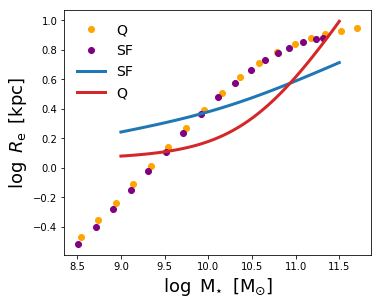

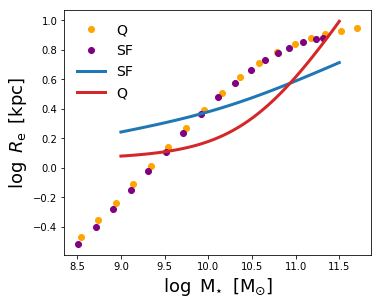

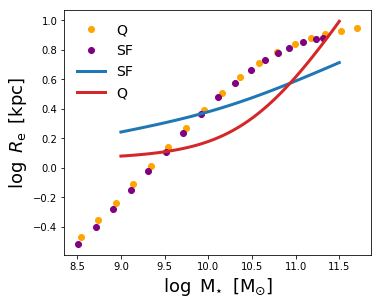

In [54]:
redshift_list = [0.0, 1.0, 2.0]
log_mass_plot = np.linspace(9.0, 11.5)

galaxy_Q = toolbox_morph.galaxy(radius_kpc, SFH_table['scale_factor'], SFH_table['SFH_Q'], [3.0, 0.7, -0.5, 0.3])
galaxy_SF = toolbox_morph.galaxy(radius_kpc, SFH_table['scale_factor'], SFH_table['SFH_SF'], [3.0, 0.7, -0.5, 0.3])

for redshift in redshift_list:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5.5, 4.5))

    # plot model
    sc = ax.plot(np.log10(mass_Q_list), np.log10(np.array(RM_Q_stack)[:, idx_min_comb]), 'o', color='orange', label='Q')
    sc = ax.plot(np.log10(mass_SF_list),np.log10(np.array(RM_SF_stack)[:, idx_min_comb]), 'o', color='purple', label='SF')

    # plot observations
    sc = ax.plot(log_mass_plot, np.log10(Mosleh2013_SF(10**log_mass_plot)), '-', lw=3, color='C0', label='SF')
    sc = ax.plot(log_mass_plot, np.log10(Mosleh2013_Q(10**log_mass_plot)), '-', lw=3, color='C3', label='Q')

    # set axes
    ax.set_xlabel(r'$\log\/\/\/\mathrm{M_{\star}}\/\/\/[\mathrm{M_{\odot}}]$', fontsize=18)
    ax.set_ylabel(r'$\log\/\/\/R_{\rm e}\/\/\/[\mathrm{kpc}]$', fontsize=18)

    #ax.set_xlim([9.0, 11.5])
    #ax.set_ylim([-0.3, 1.5])

    ax.legend(frameon=False, fontsize=14)

    plt.show()